In [39]:
import pandas as pd
import os
import glob
import numpy as np
import glidertools as gt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from datetime import date
import cmocean
import netCDF4
from netCDF4 import Dataset
import xarray as xa

import operator as op
plt.rcParams['font.family'] = 'arial'
plt.rcParams['axes.linewidth'] = 0.3

In [3]:
M2_12m = pd.read_csv('/Users/anjalishah/Desktop/EcoFOCI2024/Data/Mooring_Sites/M2/22bs2c_ecf_0012m.csv')
M2_10m = pd.read_csv('/Users/anjalishah/Desktop/EcoFOCI2024/Data/Mooring_Sites/M2/23bs2a_ecf_0010m.csv')
M2_2023_10m = pd.concat([M2_12m, M2_10m], ignore_index=True)
M2_2023_10m['time (UTC)'] = pd.to_datetime(M2_2023_10m['time (UTC)'])

M2_23m = pd.read_csv('/Users/anjalishah/Desktop/EcoFOCI2024/Data/Mooring_Sites/M2/22bs2c_ecf_0023m.csv')
M2_21m = pd.read_csv('/Users/anjalishah/Desktop/EcoFOCI2024/Data/Mooring_Sites/M2/23bs2a_ecf_0021m.csv')
M2_2023_22m = pd.concat([M2_23m, M2_21m], ignore_index=True)
M2_2023_22m['time (UTC)'] = pd.to_datetime(M2_2023_22m['time (UTC)'])

M2_45m = pd.read_csv('/Users/anjalishah/Desktop/EcoFOCI2024/Data/Mooring_Sites/M2/22bs2c_ecf_0045m.csv')
M2_43m = pd.read_csv('/Users/anjalishah/Desktop/EcoFOCI2024/Data/Mooring_Sites/M2/23bs2a_ecf_0043m.csv')
M2_2023_44m = pd.concat([M2_45m, M2_43m], ignore_index=True)
M2_2023_44m['time (UTC)'] = pd.to_datetime(M2_2023_44m['time (UTC)'])


In [46]:
M2_2023_44m

,time (UTC),latitude (degrees_north),longitude (degrees_east),depth (m),chlorophyll_fluorescence,timeseries_id
0,2022-09-04 21:00:00+00:00,56.874267,-164.065900,45.0,1.009585,22bs2c_ecf_0045m
1,2022-09-04 22:00:00+00:00,56.874267,-164.065900,45.0,0.289685,22bs2c_ecf_0045m
2,2022-09-04 23:00:00+00:00,56.874267,-164.065900,45.0,0.269790,22bs2c_ecf_0045m
3,2022-09-05 00:00:00+00:00,56.874267,-164.065900,45.0,0.325795,22bs2c_ecf_0045m
4,2022-09-05 01:00:00+00:00,56.874267,-164.065900,45.0,0.317745,22bs2c_ecf_0045m
...,...,...,...,...,...,...
8496,2023-08-27 20:00:00+00:00,56.863100,-164.050567,45.0,0.621600,23bs2a_ecf_0043m
8497,2023-08-27 21:00:00+00:00,56.863100,-164.050567,45.0,0.879200,23bs2a_ecf_0043m
8498,2023-08-27 22:00:00+00:00,56.863100,-164.050567,45.0,0.652400,23bs2a_ecf_0043m
8499,2023-08-27 23:00:00+00:00,56.863100,-164.050567,45.0,1.723400,23bs2a_ecf_0043m


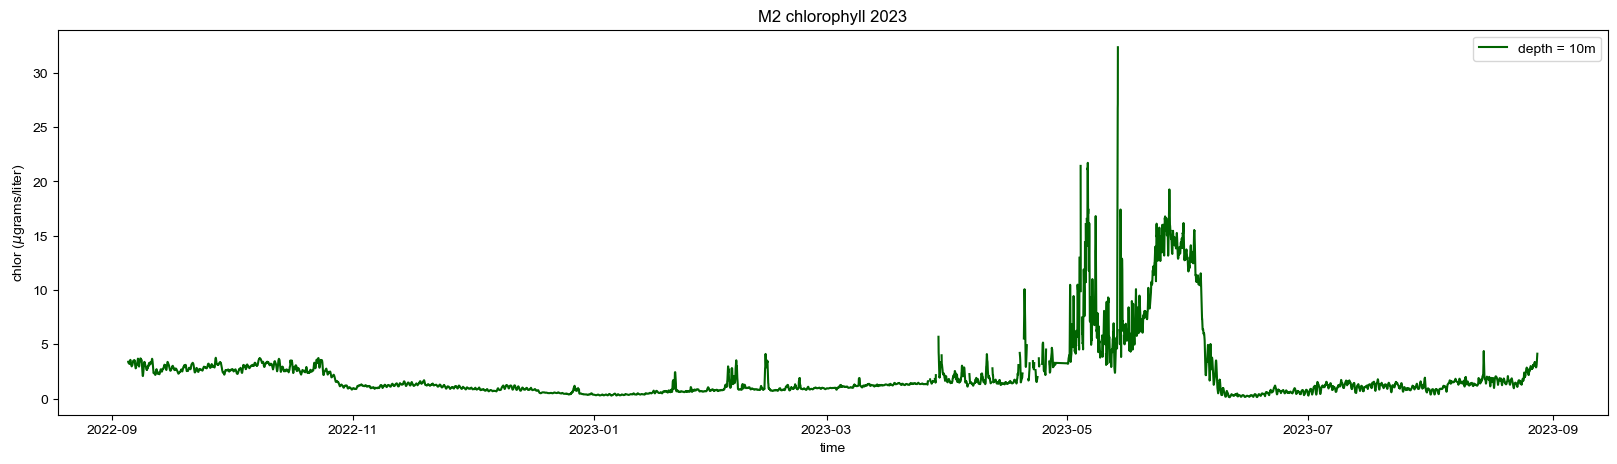

In [4]:
fig, ax = plt.subplots(figsize=(20,5))

M2_2023_10m_chlor = M2_2023_10m['chlorophyll_fluorescence'].rolling(7).mean()

ax.plot(M2_2023_10m['time (UTC)'], M2_2023_10m_chlor, color='darkgreen')
ax.set_title('M2 chlorophyll 2023')
ax.set_xlabel('time')
ax.set_ylabel('chlor (${\mu}$grams/liter)')
ax.legend(['depth = 10m'])

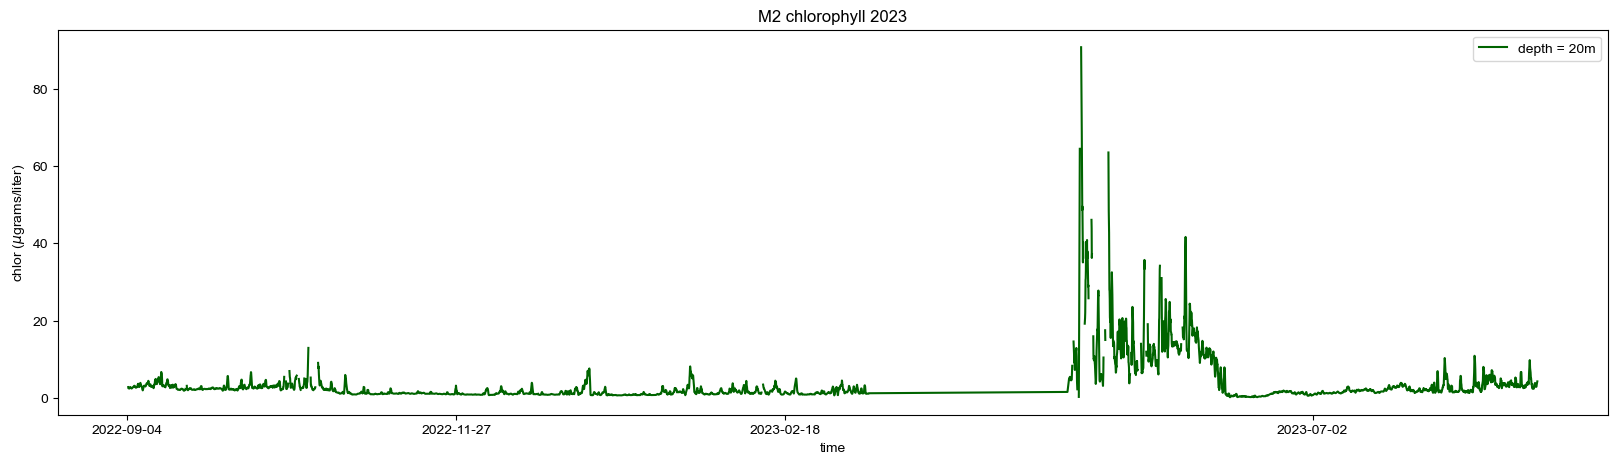

In [5]:
M2_2023_22m_chlor = M2_2023_22m['chlorophyll_fluorescence'].rolling(7).mean()
fig, ax = plt.subplots(figsize=(20,5))

ax.plot(M2_2023_22m['time (UTC)'], M2_2023_22m_chlor, color='darkgreen')
ax.set_xticks([(M2_2023_22m['time (UTC)'][0]), (M2_2023_22m['time (UTC)'][2000]), (M2_2023_22m['time (UTC)'][4000]), (M2_2023_22m['time (UTC)'][6000])])
ax.set_title('M2 chlorophyll 2023')
ax.set_xlabel('time')
ax.set_ylabel('chlor (${\mu}$grams/liter)')
ax.legend(['depth = 20m'])

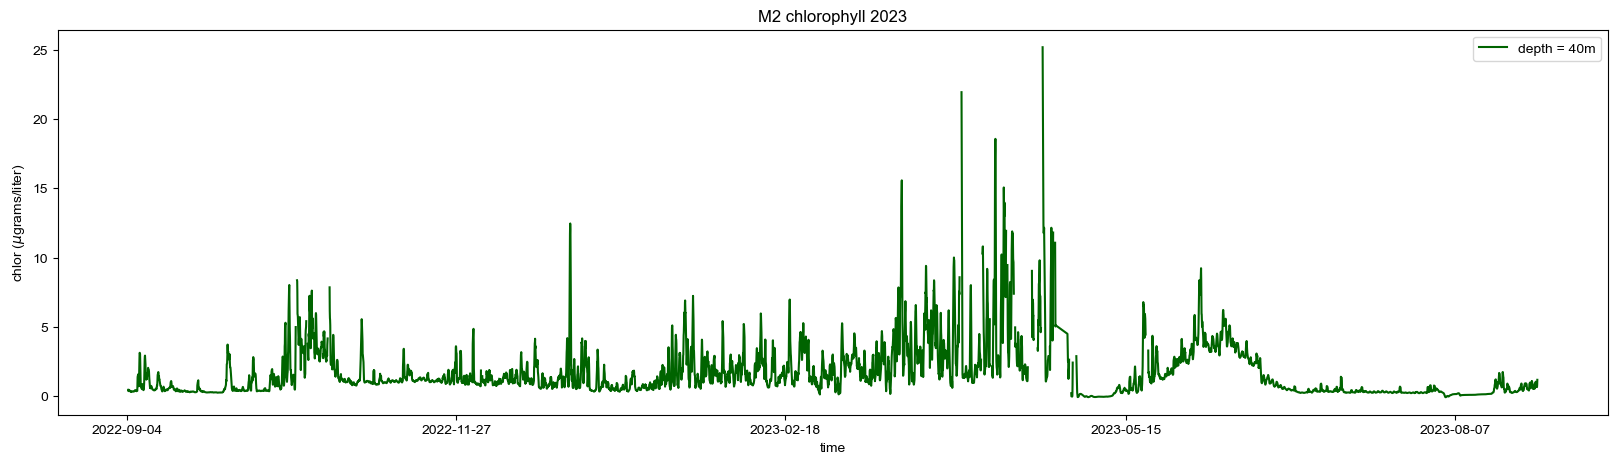

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
M2_2023_44m_chlor = M2_2023_44m['chlorophyll_fluorescence'].rolling(7).mean()
ax.plot(M2_2023_44m['time (UTC)'], M2_2023_44m_chlor, color='darkgreen')
ax.set_xticks([(M2_2023_44m['time (UTC)'][0]), (M2_2023_44m['time (UTC)'][2000]), (M2_2023_44m['time (UTC)'][4000]), (M2_2023_44m['time (UTC)'][6000]), (M2_2023_44m['time (UTC)'][8000])])
ax.set_title('M2 chlorophyll 2023')
ax.set_xlabel('time')
ax.set_ylabel('chlor (${\mu}$grams/liter)')
ax.legend(['depth = 40m'])

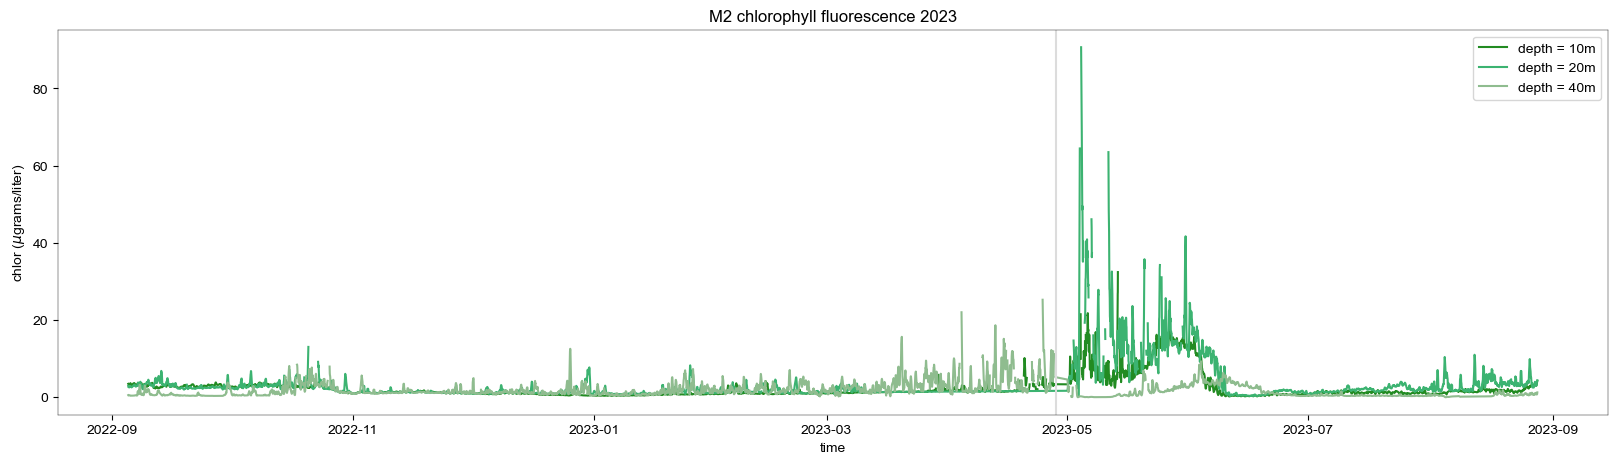

In [40]:
fig, ax = plt.subplots(figsize=(20,5))

ax.plot(M2_2023_10m['time (UTC)'], M2_2023_10m_chlor, color='forestgreen')
ax.plot(M2_2023_22m['time (UTC)'], M2_2023_22m_chlor, color='mediumseagreen')
ax.plot(M2_2023_44m['time (UTC)'], M2_2023_44m_chlor, color='darkseagreen')
ax.set_title('M2 chlorophyll fluorescence 2023')
ax.set_xlabel('time')
ax.set_ylabel('chlor (${\mu}$grams/liter)')
ax.legend(['depth = 10m', 'depth = 20m', 'depth = 40m'])
plt.axvline(x = pd.to_datetime('2023-04-28'), color = 'gainsboro')
